In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [9]:
mnist = tf.keras.datasets.mnist # 28* 28 images of hand written digits 0-9

In [31]:
# Unpack dataset to training and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalizing Data or scaling data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# Creating the architecture of the nural network models, choosed sequential model
model = tf.keras.models.Sequential()

# Basically Flatten make the multidimentional array to a 1 dimentional array
model.add(tf.keras.layers.Flatten())

# Now I will add inner neuron some other call deep neuron
# Here I will use 128 dense neuron and for activation function, I use relu in which, the layer will activated when the value of x>0
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# softmax is the probability density function which will get the digit which has higher probability
# I used 10 output neuron as there are 10 digits
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Now I will add some parameters for training the model
# A neural network is never try to maximise the accuracy, it always try to minimize the loss 
# Optimizer=?
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             matrics=['accuracy'])


# Now I am ready to train my model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3742 - val_loss: 0.1862
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1503 - val_loss: 0.1318
Epoch 3/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1024 - val_loss: 0.1091
Epoch 4/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0761 - val_loss: 0.0920
Epoch 5/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0590 - val_loss: 0.0929
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0463 - val_loss: 0.0903
Epoch 7/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0382 - val_loss: 0.0883
Epoch 8/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0307 - val_loss: 0.0870
Epoch 9/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0232 - val_

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

0.11594976515862873


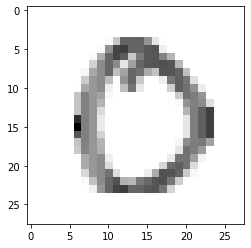

In [16]:
plt.imshow(x_train[88], cmap = plt.cm.binary)
plt.show()

In [35]:
model.save('hand writing classification - susmoy.model')

In [37]:
new_model = tf.keras.models.load_model('hand writing classification - susmoy.model')

In [39]:
predictions = new_model.predict(x_test)
print(predictions)

[[1.17922450e-13 4.18621513e-15 1.06072777e-13 ... 1.00000000e+00
  1.56656979e-12 3.46694006e-12]
 [5.01406249e-17 7.49273421e-10 1.00000000e+00 ... 3.48565390e-18
  5.51177392e-22 3.98490972e-23]
 [1.11239841e-13 9.99999642e-01 5.72565662e-10 ... 1.76812478e-07
  1.83995851e-07 8.83444793e-12]
 ...
 [4.24548026e-21 7.51209042e-15 2.24828272e-20 ... 5.58725028e-12
  6.02989811e-11 1.53247615e-09]
 [1.07628969e-17 1.22630635e-14 2.11740763e-19 ... 1.62812201e-14
  8.46007531e-09 2.96102023e-21]
 [2.90393360e-12 6.45710091e-12 7.55625353e-14 ... 3.49065488e-19
  5.48494001e-17 1.17845801e-16]]


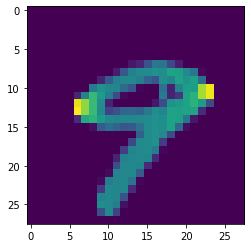

In [41]:
import numpy as np

plt.imshow(x_test[9])
plt.show()

In [42]:
print('The predicted result is: ',np.argmax(predictions[9]))

The predicted result is:  9
